### 2次元のカーブフィッティング

scipy.optimize.square_leastによるカーブフィッティング

scipy.optimize.sqlstはアルゴリズムが古いみたい

#### ref

- [Three examples of nonlinear least\-squares fitting in Python with SciPy](https://hernandis.me/img/posts/2020/nls-fitting/)
- http://ishikawa-vision.org/~koichi/Lecture/Pattern/2001/l4.pdf
- SVD | convexbrainのけんきうメモ https://convexbrain.github.io/studynotes/SVD

In [34]:
from scipy.optimize import least_squares
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D
from numpy import *

In [35]:
def model(x, y, a, b):
    return power(x + a, 2) + power(y + b, 2)

In [46]:
x = linspace(-5, 5, 21)
y = linspace(-5, 5, 21)
gx, gy = meshgrid(x, y)
gz = model(gx, gy, a=0.3, b=-0.5)
gz_exp = gz + random.normal(0, 5, (len(x), len(y)))

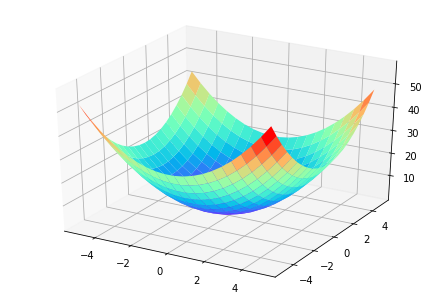

In [47]:
ax = Axes3D(figure())
ax.plot_surface(gx, gy, gz, cmap='rainbow')

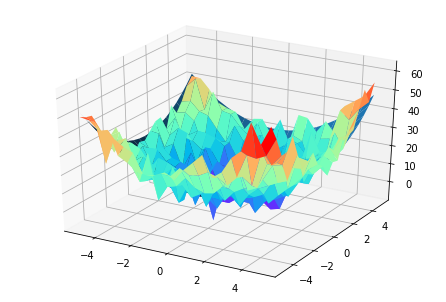

In [48]:
ax = Axes3D(figure())
ax.plot_surface(gx, gy, gz)
ax.plot_surface(gx, gy, gz_exp, cmap='rainbow')

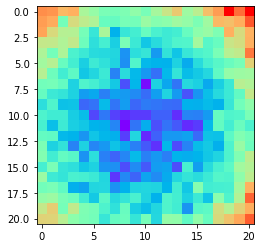

In [49]:
ax = figure().add_subplot(1,1,1)
ax.imshow(gz_exp, cmap='rainbow')

In [50]:
# 引数を１つにしたコスト関数を作る
def cost_func(param):
    return (model(gx, gy, param[0], param[1]) - gz_exp).flatten()

In [51]:
# コスト関数と初期値を与える
res = least_squares(cost_func, [0., 0.])

In [52]:
res

 active_mask: array([0., 0.])
        cost: 5336.380025333774
         fun: array([ 2.72726949e+00, -9.29665109e-01, -4.29149517e-01, -5.27231791e+00,
        4.37120890e+00,  4.65817242e+00,  6.56919163e+00,  5.68907004e+00,
        3.68411020e+00,  8.11708751e-01,  4.05447845e+00, -1.81462661e+00,
       -5.60131349e+00, -9.05131364e+00,  3.74918505e+00,  2.51794053e+00,
       -2.76083685e+00, -3.60486516e+00, -1.49389750e+01, -2.00887405e-01,
       -5.11048641e+00, -7.89936364e-01, -3.54953678e+00,  1.32967755e+01,
       -4.16101504e+00, -3.86028997e+00, -4.24704659e+00,  4.07536141e+00,
        2.71187230e+00, -5.66185954e-01, -6.65650217e-01, -5.88676183e+00,
       -2.58257436e+00, -2.39130084e+00, -3.61478528e+00,  1.38834422e-01,
        5.87340345e+00,  3.83160682e+00, -5.24011626e+00, -3.65447764e-01,
        1.77877307e+00, -2.50067552e+00, -4.78416833e+00, -1.84519230e+00,
       -8.36711011e-01, -4.22290429e+00,  1.70134008e+00,  8.09278079e+00,
       -1.02310189e+01, 

In [53]:
# 推定結果はxに格納されている
res.x

array([ 0.27950838, -0.50564242])

In [54]:
# データ保存
import pandas as pd
df = pd.DataFrame()
df['x'] = gx.flatten()
df['y'] = gy.flatten()
df['z'] = gz.flatten()
df.to_csv('data2.csv', index=None)

In [56]:
# 読み込み
df_ = pd.read_csv('data2.csv')
gx_ = array(df.x).reshape(21,21)
gy_ = array(df.y).reshape(21,21)
gz_ = array(df.z).reshape(21,21)